In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [4]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'raw_news_data','raw_analyst_ratings.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data = data[['date','headline','url','publisher','stock']]
data.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [6]:
data.tail()

,date,headline,url,publisher,stock
1407323,2011-08-29 00:00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX
1407324,2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX
1407325,2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX
1407326,2011-06-21 00:00:00,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX
1407327,2011-05-12 00:00:00,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,ZX


**Descriptive Statistics**

In [10]:
data['headline_length'] = data['headline'].apply(len)
# Descriptive statistics for headline length
headline_stats = data['headline_length'].describe()
article_count_by_publisher = data['publisher'].value_counts()
print(headline_stats)
print(article_count_by_publisher)
data.head()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


,date,headline,url,publisher,stock,headline_length
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


In [13]:
article_count_by_publisher.head(25)

publisher
Paul Quintaro           228373
Lisa Levin              186979
Benzinga Newsdesk       150484
Charles Gross            96732
Monica Gerson            82380
Eddie Staley             57254
Hal Lindon               49047
ETF Professor            28489
Juan Lopez               28438
Benzinga Staff           28114
Vick Meyer               24826
webmaster                20313
Benzinga_Newsdesk        19410
Zacks                    19390
Jayson Derrick           19050
Allie Wickman            18317
Shanthi Rexaline         16640
Craig Jones              16221
Wayne Duggan             12897
Nelson Hem               12590
Dwight Einhorn           12226
Michael J. Zerinskas     10892
Joe Young                10777
Javier Hasse              8839
David Johnson             8749
Name: count, dtype: int64

In [14]:
# Convert the column to datetime
data['date'] = pd.to_datetime(data['date'], format='ISO8601')
# Eract only the date
data['date'] = data['date'].dt.date
data.head()

,date,headline,url,publisher,stock,headline_length
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2,2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


<Figure size 700x500 with 0 Axes>

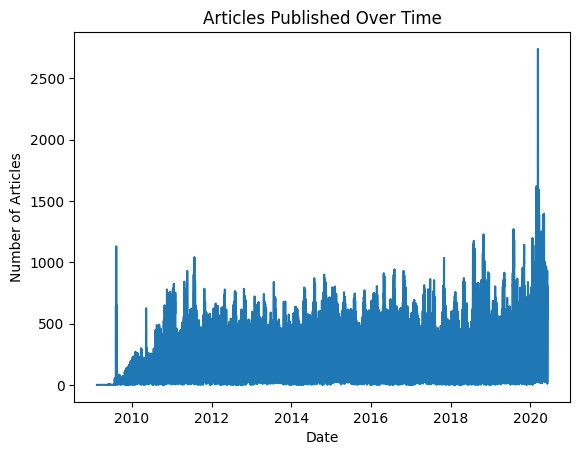

articles_per_month
date
2009-02        1
2009-04        3
2009-05       12
2009-06       40
2009-07       75
           ...  
2020-02    18879
2020-03    24994
2020-04    20757
2020-05    17992
2020-06     6447
Freq: M, Name: count, Length: 136, dtype: int64


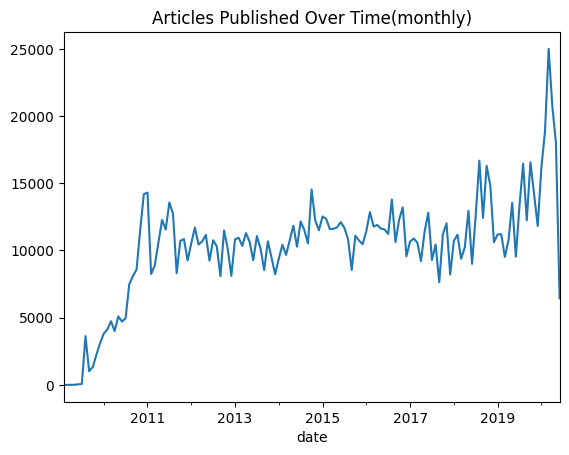

In [15]:
import matplotlib.pyplot as plt

# Plot Close price and MACD
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
# Count articles per day
articles_per_day = data['date'].value_counts().sort_index()
print(articles_per_day)

# Optional: Plotting the trend over time
articles_per_day.plot(kind='line', title='Articles Published Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()


# Convert the date column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

# Set the date as the index
data.set_index('date', inplace=True)

# Now convert the index to a period and count articles per month
articles_per_month = data.index.to_period('M').value_counts().sort_index()
print('articles_per_month')
print(articles_per_month)
# Optional: Plotting the trend over time
articles_per_month.plot(kind='line', title='Articles Published Over Time(monthly)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()

**Text Analysis(Sentiment analysis & Topic Modeling)**

In [ ]:
from textblob import TextBlob

# Assuming your dataset is loaded into a DataFrame called 'data'
# Define a function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Determine the sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the headline column
data['sentiment'] = data['headline'].apply(get_sentiment)

# Display the result
print(data[['headline', 'sentiment']].head())

# Count the sentiment distribution
sentiment_distribution = data['sentiment'].value_counts()
print(sentiment_distribution)

# Analyze sentiment by publisher
sentiment_by_publisher = data.groupby('publisher')['sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_publisher)


In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of News Headlines')
plt.show()
